# 

Fuel Efficiency Project


1. Data Acquisition:

For this example, we can use the UCI Machine Learning Repository's "Auto MPG" dataset.




In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

data = pd.read_csv(url, sep="\s+", names=column_names)


In [3]:
print(data.head())



    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


Replace "?" with NaN and convert the column to a numeric type:



In [8]:
import numpy as np

data['horsepower'].replace('?', np.nan, inplace=True)
data['horsepower'] = data['horsepower'].astype(float)


In [9]:
data.dropna(inplace=True)


4. Exploratory Data Analysis (EDA):


In [10]:
print(data.describe())


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

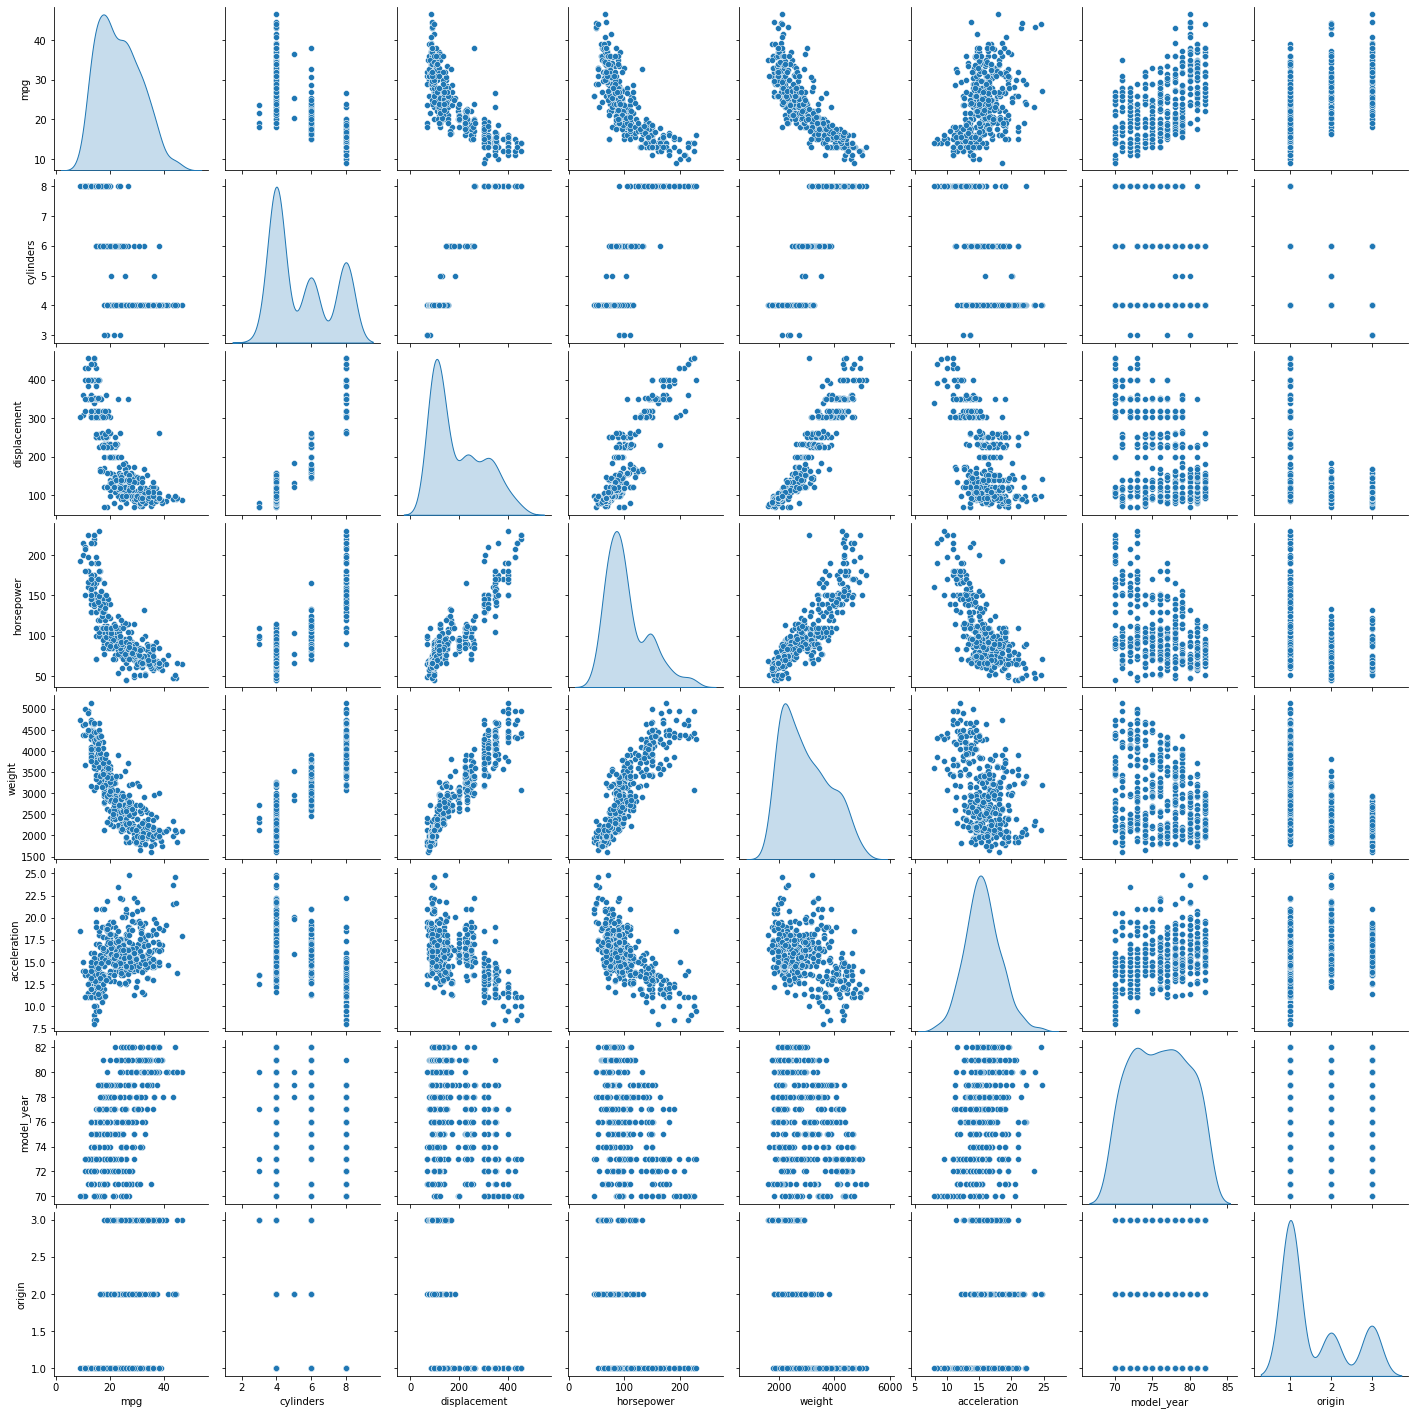

In [12]:
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, diag_kind='kde')
plt.show()


# Build Model

Build using simple linear regression using mpg as target variable. and other numerical columbns as predictors...

In [15]:
#preparing my data 

from sklearn.model_selection import train_test_split

X = data[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#building the model now 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 10.502370329417314


Interpretation and analysis 

Here our MSE quantifies the difference between the estimator and what is estimated. Given this MSE value of 10.5024, it means that, on average, the model's predictions deviate from the actual values by the square root of this value (since MSE gives the squared error). This deviation, known as the Root Mean Squared Error (RMSE), is:

### RMSE Calculation:



Given the formula:
$$ RMSE = \sqrt{MSE} $$

Using the provided MSE value:
$$ RMSE = \sqrt{10.5024} $$

We get:
$$ RMSE \approx 3.24 $$


Some immediate questions I have : In order to ensure validity, what is the range of the target variable? Is our mse good? 2. Is there a baseline model we can compare to? 3. Is this model very complex? 4. Lastly I will do some residual analysis. 


In [18]:
#1. Range of the target variable and interpretation of MSE 
mpg_range = data['mpg'].max() - data['mpg'].min()
print(f"Range of mpg: {mpg_range}")


Range of mpg: 37.6


Interpretation: whether the MSE is good depends on this range. If the range is, for example, 40 mpg and the average error (RMSE) is around 3.24 mpg, it might be considered reasonable since it's a relatively small fraction of the range. If the range is smaller, say around 10 mpg, then an RMSE of 3.24 might be more concerning.

In [20]:
#2. Comparing Baseline Model: 
baseline_pred = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
print(f"Baseline MSE: {baseline_mse}")


Baseline MSE: 51.62029239680699


Model's MSE: 10.5024
Baseline MSE: 51.6203
My model's MSE (10.5024) is significantly lower than the baseline MSE (51.6203). This is a strong indication that my model is adding value and performing much better than a simple model that always predicts the mean of the target variable.

Further Steps: Even though the model performs better than the baseline, there might be room for improvement. For instance, feature engineering, trying other algorithms, or tuning hyperparameters might further reduce the MSE.

Also should account for that other events can impact this model such as the study below. Weather related events. 

2021 study also took other weather conditions into account, and Wu found that crashes increased during heat waves when there wasn't precipitation. Fewer people take to the roads on rainy days, and those who do are more likely to drive with caution, he explains
https://www.scientificamerican.com/article/hotter-days-are-increasing-car-crashes-and-fatalities/#:~:text=Over%20the%20last%20decade%20researchers,change%20fuels%20record%2Dbreaking%20heat.